In [23]:
# referenced this walkthrough: https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/

## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


In [6]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the wine Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [7]:
# Load the dataset
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [10]:
#convert the dataset into a pandas dataframe
df = pd.DataFrame(wine['data'], columns = wine['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
# check for missing values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [20]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df), columns = df.columns) #scaling the data
scaled_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


<AxesSubplot: >

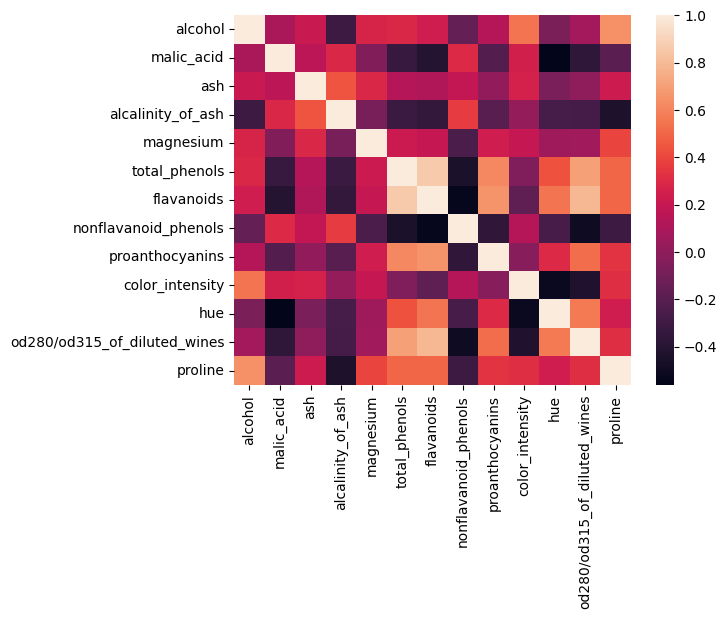

In [22]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr()) # if certain features are highly correlated, means we need to apply dimensionality reduction

In [53]:
corr_mat = scaled_data.corr()

In [62]:
import numpy as np
values, vectors = np.linalg.eig(corr_mat)
print(values)
print(vectors)

[4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.10337794 0.34849736 0.16877023 0.28887994 0.22578864
 0.25090248]
[[-0.1443294  -0.48365155  0.20738262 -0.0178563   0.26566365 -0.21353865
  -0.05639636  0.01496997 -0.39613926  0.26628645  0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758 -0.22493093 -0.08901289  0.53689028 -0.03521363 -0.53681385
   0.42052391  0.02596375 -0.06582674 -0.12169604 -0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106 -0.31606881 -0.6262239  -0.21417556  0.14302547 -0.15447466
  -0.14917061 -0.14121803  0.17026002  0.04962237 -0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041  0.0105905  -0.61208035  0.06085941 -0.06610294  0.10082451
  -0.28696914  0.09168285 -0.42797018  0.05574287  0.20044931  0.47931378
   0.05279942]
 [-0.14199204 -0.299634   -0.13075693 -0.35179658 -0.72704851 -0.03814394
   0.3228833   0.05677422  0.15636143 -0.06222011  0.27140257  0.07128891
   0.06787022]
 [-0.39466085 -0.06503951 -0.14617896 

In [60]:
weight = ['{:.2f}%'.format(val*100 / sum(values)) for val in values]
weight

['36.20%',
 '19.21%',
 '11.12%',
 '7.07%',
 '6.56%',
 '4.94%',
 '4.24%',
 '0.80%',
 '2.68%',
 '1.30%',
 '2.22%',
 '1.74%',
 '1.93%']

In [64]:
explained_variance = pd.DataFrame(weight, index=df.columns)

In [69]:
explained_variance

,0
alcohol,36.20%
malic_acid,19.21%
ash,11.12%
alcalinity_of_ash,7.07%
magnesium,6.56%
total_phenols,4.94%
flavanoids,4.24%
nonflavanoid_phenols,0.80%
proanthocyanins,2.68%
color_intensity,1.30%


In [ ]:
sns.scatterplot(

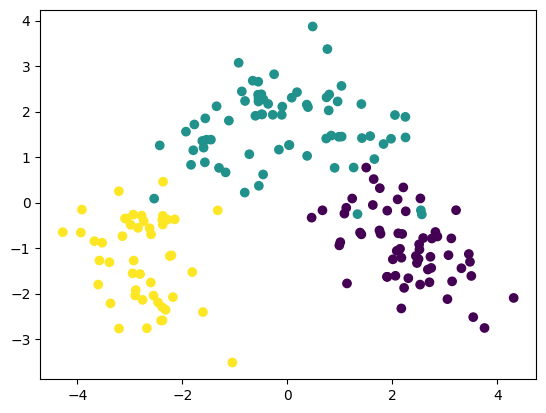

In [75]:
import matplotlib.pyplot as plt
#Applying PCA
#Taking no. of Principal Components as 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
# data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
# data_pca.head()
plot = plt.scatter(data_pca[:,0], data_pca[:,1], c=wine['target'])
# plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

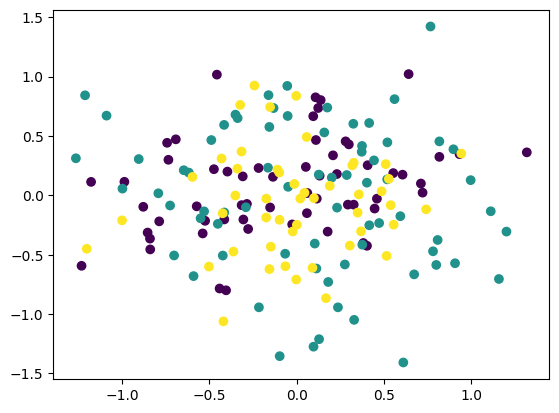

In [77]:
pca = PCA(n_components = 10)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
# data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
# data_pca.head()
plot = plt.scatter(data_pca[:,-2], data_pca[:,-1], c=wine['target'])
# plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

<AxesSubplot: >

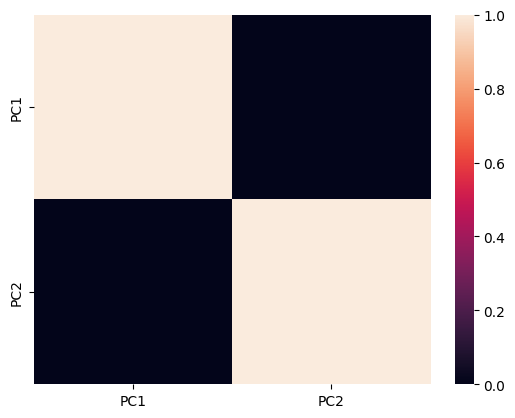

In [47]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

<AxesSubplot: >

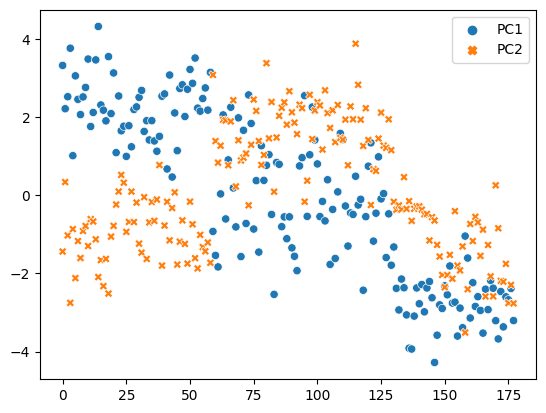

In [48]:
sns.scatterplot(data_pca)

_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.